# Pytorch MNIST tutorial


## imports

In [74]:
import pandas as pd

import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

train_path = './data/train.csv'

## utils function:

In [130]:
def plot_img(x):
    x=x.reshape(28,28)
    plt.imshow(x)
    plt.show()

In [131]:
df = pd.read_csv('./data/train.csv')

len(df)

42000

In [132]:
Y = df['label']
X = df.iloc[:,1:].as_matrix().reshape(42000,1,28,28)
# X.reshape(42000,1,28,28)

In [133]:
X[0].shape

(1, 28, 28)

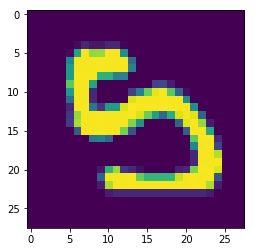

In [142]:
y= X[443]
plot_img(y)

## Dataset class
__torch.utils.data.Dataset__ is an abstract class representing a dataset. Your custom dataset `should inherit Dataset and override the following methods`:

1. `__len__` so that len(dataset) returns the size of the dataset.
2. `__getitem__` to support the indexing such that `dataset[i]` can be used to get ith sample

In [139]:
class MnistDataset(Dataset):
    def __init__(self):
        df = pd.read_csv(train_path)
        self.X = df.iloc[:,1:].as_matrix().reshape(42000,1,28,28)
        self.Y = df['label'].as_matrix()
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self,idx):
        # return numpy array OR torch tensor ???
        return self.X[idx]
        
        

## Define the network

Neural networks can be constructed using the `torch.nn` package.

nn depends on autograd to define models and differentiate them. An `nn.Module` contains layers, and a method `forward(input)` that returns the output.

In [6]:
class Net(nn.Module):
    def __init__(self, d_in, d_out):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(d_in, d_in//2)
        self.fc2 = nn.Linear(d_in//2, d_out)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.softmax(x)
    

        

In [8]:
net = Net(784, 10)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)
net.to(device)
for param in net.parameters():
    print(param.shape)

cuda:0
torch.Size([392, 784])
torch.Size([392])
torch.Size([10, 392])
torch.Size([10])


In [27]:
# input = torch.rand(2, 28*28)
input = torch.tensor(X.values, dtype=torch.float, device='cuda:0')

# out = net(input)
# print(out)

tensor([[ 2.6095e-06,  1.6545e-08,  5.9857e-10,  ...,  8.7844e-12,
          2.3835e-04,  1.0835e-10],
        [ 6.1308e-06,  4.2345e-07,  6.2853e-30,  ...,  6.4559e-23,
          6.9533e-28,  9.2715e-17],
        [ 1.0651e-13,  1.0651e-13,  4.9342e-08,  ...,  1.0651e-13,
          1.0651e-13,  5.8917e-08],
        ...,
        [ 3.9273e-13,  2.1534e-10,  4.5062e-17,  ...,  1.9839e-23,
          1.9839e-23,  1.9839e-23],
        [ 3.3491e-12,  1.2110e-18,  3.6181e-14,  ...,  1.0923e-18,
          1.2461e-16,  3.3999e-15],
        [ 1.0627e-02,  8.8418e-12,  2.3095e-04,  ...,  1.2311e-07,
          1.1172e-10,  1.8880e-07]], device='cuda:0')


C:\Users\hrj28\AppData\Local\conda\conda\envs\ptorch\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


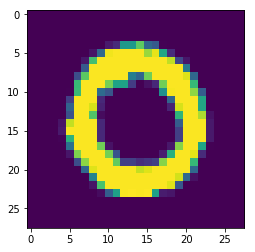

In [49]:

img1 = X.iloc[1,:].values.reshape(28,28)
plot_img(img1)

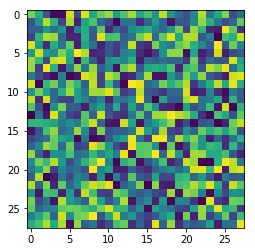

In [137]:
t = torch.rand(28,28).random_(0, 255)
plot_img(t)